# Wstęp

Jest to mój pierwszy projekt z zakresu data science. Projekt stanowił część zaliczenie na mojej uczelni z Wielowymiarowej analizy danych. Dane pochodzą od prowadzącego przedmiot, są to dane sztuczne, stąd wyniki będą niemal idealne. Celem projektu było stworzenie czterech modeli klasyfikacyjnych do predykcji zmiennej celu 'status kredytobiorcy'. Dane są zbalansowane. Nie ma braków danych.

# Zrozumienie danych

In [91]:
# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd  
import seaborn as sns
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel('Dane.xlsx')

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [92]:
data.shape

(4796, 31)

In [93]:
data.columns

Index(['status kredytobiorcy', 'status mieszkania', 'Dochód I-go kredytob..',
       'Dochód II-go kredytob./żyranta', 'miejsce zam',
       'poziom wykształcenia I-go', 'rodzaj wyksztalcenia I-go',
       'wiek I-go kredytob.', 'staż pracy I-go kredytob.',
       'Aktyw/pasywa I-go kredytobiorcy', 'rodzaj zatrudnienia',
       'miejsce urodzenia I-szego', 'stan rodzinny', 'Wartość samoch.',
       'rodzaj pracodawcy', 'wielkość pracodawcy', 'posiada kartę kredytową ?',
       'posiada  ROR', 'posiada debetową ?',
       'Czy korzysta z dostepu do produktów przez intrernet?',
       'Czy ma konto na facebooku',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?',
       'ile posiada produktów w Naszym banku?',
       'w ilu bankach ma zakupioneprodukty ?',
       'Czy korzysta z dostepu do produktów przez intrernet?.1',
       'Czy ma konto na facebooku.1',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1',
       'ile posiada produ

In [94]:
data.head()

,status kredytobiorcy,status mieszkania,Dochód I-go kredytob..,Dochód II-go kredytob./żyranta,miejsce zam,poziom wykształcenia I-go,rodzaj wyksztalcenia I-go,wiek I-go kredytob.,staż pracy I-go kredytob.,Aktyw/pasywa I-go kredytobiorcy,...,czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?,ile posiada produktów w Naszym banku?,w ilu bankach ma zakupioneprodukty ?,Czy korzysta z dostepu do produktów przez intrernet?.1,Czy ma konto na facebooku.1,czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1,ile posiada produktów w Naszym banku?.1,w ilu bankach ma zakupioneprodukty ?.1,czy był w tym roku na wakacjach zagranicznych?,czy z konta na Facebooku wynika że lubi piwo?
0,0,dom,13455.40,11247.41,małe m.,średnie,prawnicze,43,24,-11241.33,...,nie,2,1,tak,nie,nie,3,1,tak,nie
1,0,mieszk. wł.,11701.19,12492.62,duże m.,średnie,Ekonomiczne,50,31,96786.23,...,tak,0,2,nie,nie,nie,1,1,nie,nie
2,0,dom,9649.56,7686.70,średnie m.,mgr,biologiczne,45,25,22552.74,...,nie,1,1,tak,tak,tak,1,1,tak,tak
3,0,mieszk. wynajemm,8655.94,6963.25,małe m.,mgr,ściłe,47,29,94658.43,...,tak,1,1,tak,tak,nie,2,1,nie,nie
4,0,dom,12823.45,10454.14,małe m.,gimnazjum,ogolne,49,30,48096.57,...,nie,0,1,tak,nie,nie,2,1,tak,tak


In [95]:
data.describe()

,status kredytobiorcy,Dochód I-go kredytob..,Dochód II-go kredytob./żyranta,wiek I-go kredytob.,staż pracy I-go kredytob.,Aktyw/pasywa I-go kredytobiorcy,Wartość samoch.,ile posiada produktów w Naszym banku?,w ilu bankach ma zakupioneprodukty ?,ile posiada produktów w Naszym banku?.1,w ilu bankach ma zakupioneprodukty ?.1
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000
mean,0.500417,9112.303561,6109.894537,39.737073,21.746247,28339.043590,42004.202977,1.581109,1.421393,1.436405,1.379483
std,0.500052,1869.687636,2654.219338,10.963143,11.018689,19296.409775,18336.265231,1.020892,0.929570,0.925325,0.884031
min,0.000000,4815.300000,0.000000,18.000000,0.000000,-45800.390000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,7664.002500,3852.842500,32.000000,14.000000,14965.310000,29876.080000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,8825.295000,5025.535000,40.000000,22.000000,23926.440000,38734.545000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,10389.877500,8239.995000,48.000000,30.000000,41224.950000,52897.750000,2.000000,1.000000,2.000000,1.000000
max,1.000000,15208.670000,17497.290000,67.000000,51.000000,130383.860000,147527.320000,4.000000,5.000000,5.000000,5.000000


Widzimy że wartości min/max wydają się prawdopodobne. To znaczy nie ma widocznych anomali takich jak błednie wpisane, za duże lub za małe wyniki.

# Regresja logistyczna bez inżynierii cech

Widzimy, że wartości min/max wydają się prawdopodobne. To znaczy, nie ma widocznych anomalii takich jak błędnie wpisane, za duże lub za małe wyniki.

In [103]:
data2 = data.copy()

In [104]:
X = data2.loc[:, data.columns != 'status kredytobiorcy']
y = data2.loc[:, data.columns == 'status kredytobiorcy']


In [105]:
X = pd.get_dummies(X, drop_first = False)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [107]:
logreg = LogisticRegression(max_iter = 500, random_state = 1)
logreg.fit(X_train, y_train)
print('Trafność regresji logistycznej na zbiorze testowym: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Trafność regresji logistycznej na zbiorze treningowym: {:.2f}'.format(logreg.score(X_train, y_train)))

Trafność regresji logistycznej na zbiorze testowym: 0.96
Trafność regresji logistycznej na zbiorze treningowym: 0.97


In [108]:
log_score = cross_val_score(logreg, X, y, cv = 10)
#Score logreg cross validation
print("Średni wynik:", log_score.mean())

Średni wynik: 0.981027313848295


# Eksploracyjna analiza danych (EDA)

In [27]:
numeric = data.select_dtypes(exclude=['object']).copy()

In [28]:
dyskretne = ['ile posiada produktów w Naszym banku?', 
             'w ilu bankach ma zakupioneprodukty ?', 'ile posiada produktów w Naszym banku?.1', 
             'w ilu bankach ma zakupioneprodukty ?.1']


In [29]:
ciągłe =[]

for i in numeric.columns:
    if i not in dyskretne:
        ciągłe.append(i)
ciągłe.remove('status kredytobiorcy')
print(ciągłe)

['Dochód I-go kredytob..', 'Dochód II-go kredytob./żyranta', 'wiek I-go kredytob.', 'staż pracy I-go kredytob.', 'Aktyw/pasywa I-go kredytobiorcy', 'Wartość samoch.']


In [30]:
categorical = data.select_dtypes(include = ['object']).copy()
categorical.columns

Index(['status mieszkania', 'miejsce zam', 'poziom wykształcenia I-go',
       'rodzaj wyksztalcenia I-go', 'rodzaj zatrudnienia',
       'miejsce urodzenia I-szego', 'stan rodzinny', 'rodzaj pracodawcy',
       'wielkość pracodawcy', 'posiada kartę kredytową ?', 'posiada  ROR',
       'posiada debetową ?',
       'Czy korzysta z dostepu do produktów przez intrernet?',
       'Czy ma konto na facebooku',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?',
       'Czy korzysta z dostepu do produktów przez intrernet?.1',
       'Czy ma konto na facebooku.1',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1',
       'czy był w tym roku na wakacjach zagranicznych?',
       'czy z konta na Facebooku wynika że lubi piwo?'],
      dtype='object')

In [31]:
cat1 = ['status mieszkania', 'miejsce zam', 'poziom wykształcenia I-go',
       'rodzaj wyksztalcenia I-go', 'rodzaj zatrudnienia',
       'miejsce urodzenia I-szego', 'stan rodzinny', 'rodzaj pracodawcy',
       'wielkość pracodawcy', 'posiada kartę kredytową ?', 'posiada  ROR',
       'posiada debetową ?']
cat2 = ['Czy korzysta z dostepu do produktów przez intrernet?',
       'Czy ma konto na facebooku',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?',
       'Czy korzysta z dostepu do produktów przez intrernet?.1',
       'Czy ma konto na facebooku.1',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1',
       'czy był w tym roku na wakacjach zagranicznych?',
       'czy z konta na Facebooku wynika że lubi piwo?']

## Zmienne ciągłe

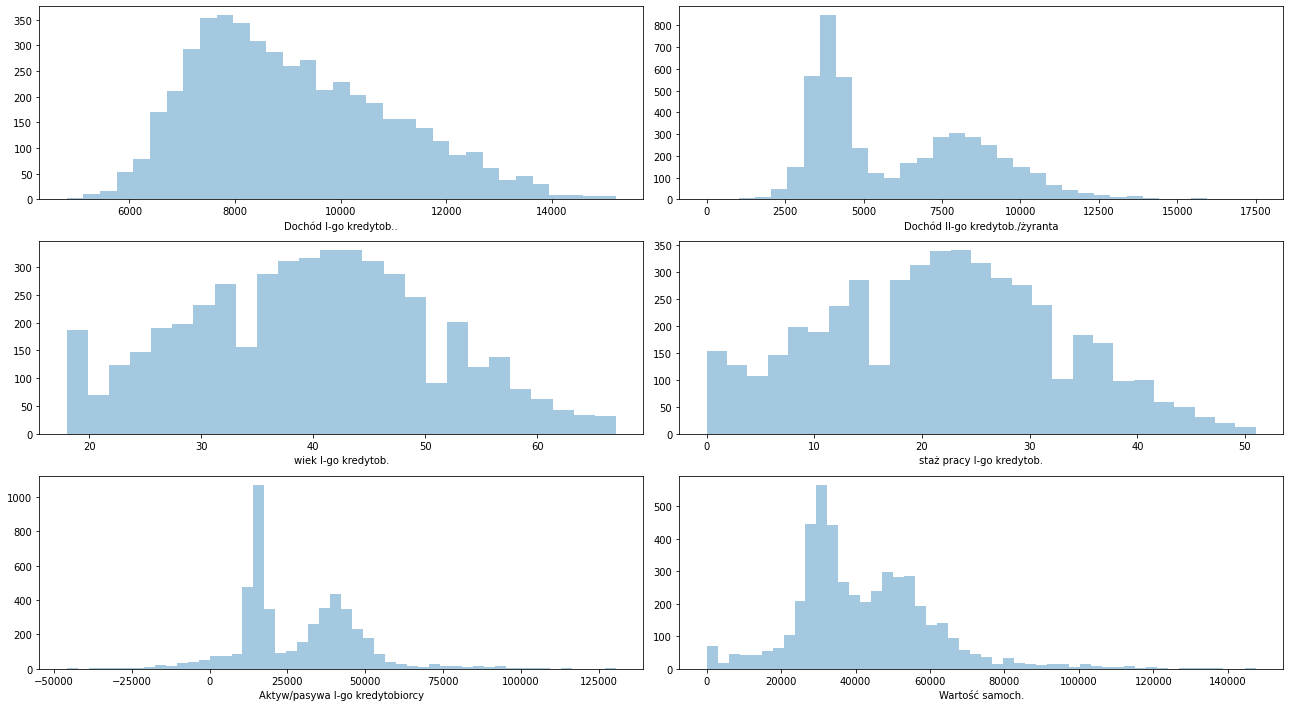

In [32]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(ciągłe):

        plt.subplot(5,2,index+1)
        sns.distplot(numeric.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

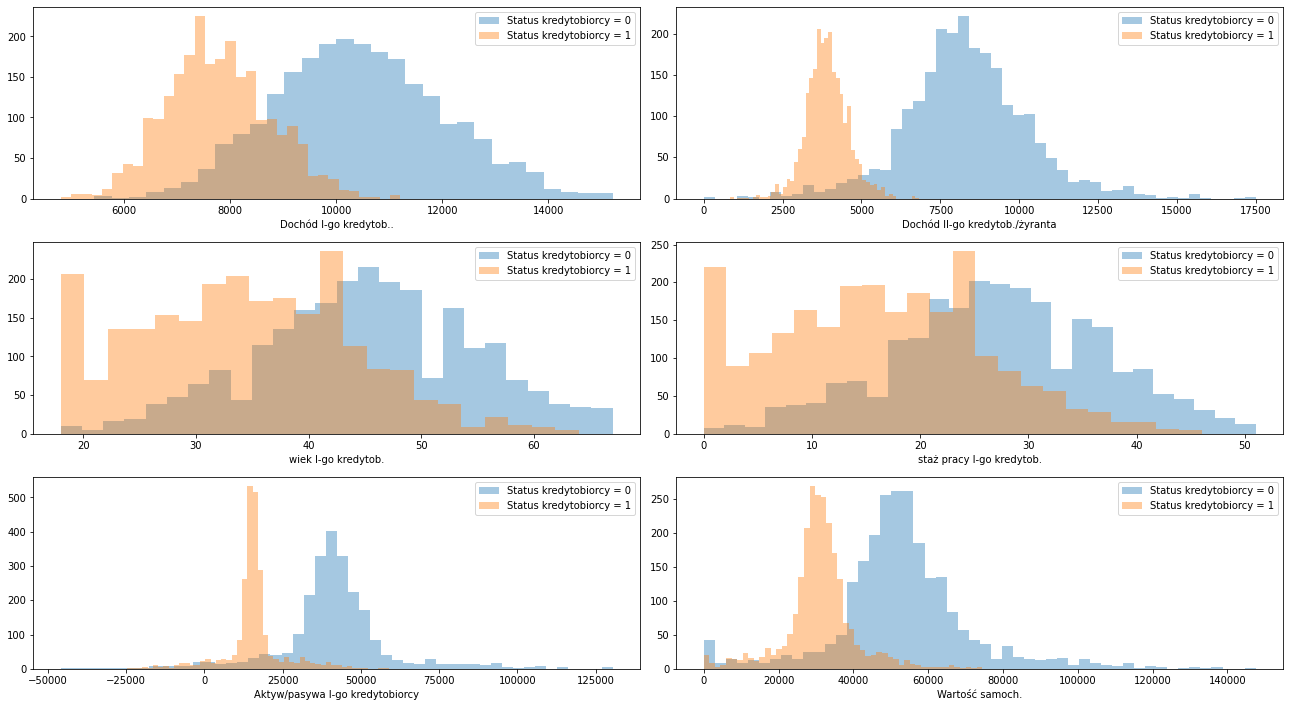

In [33]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(ciągłe):
    plt.subplot(5,2,index+1)
    sns.distplot(numeric.loc[numeric['status kredytobiorcy'] == 0, col].dropna(), label = 'Status kredytobiorcy = 0', kde = False)
    sns.distplot(numeric.loc[numeric['status kredytobiorcy'] == 1, col].dropna(), label = 'Status kredytobiorcy = 1', kde = False)
    plt.legend()
fig.tight_layout(pad=1.0)

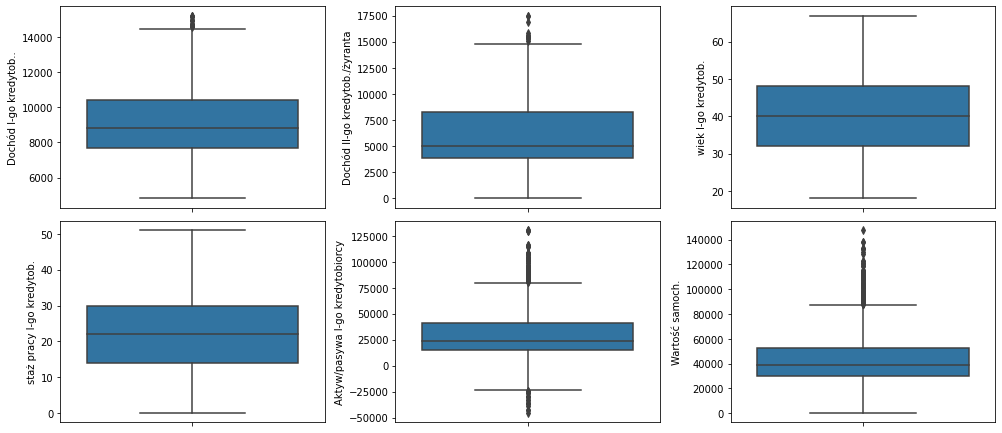

In [34]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(ciągłe):
    plt.subplot(5,3,index+1)
    sns.boxplot(y=col, data=numeric.dropna())
fig.tight_layout(pad=1.0)

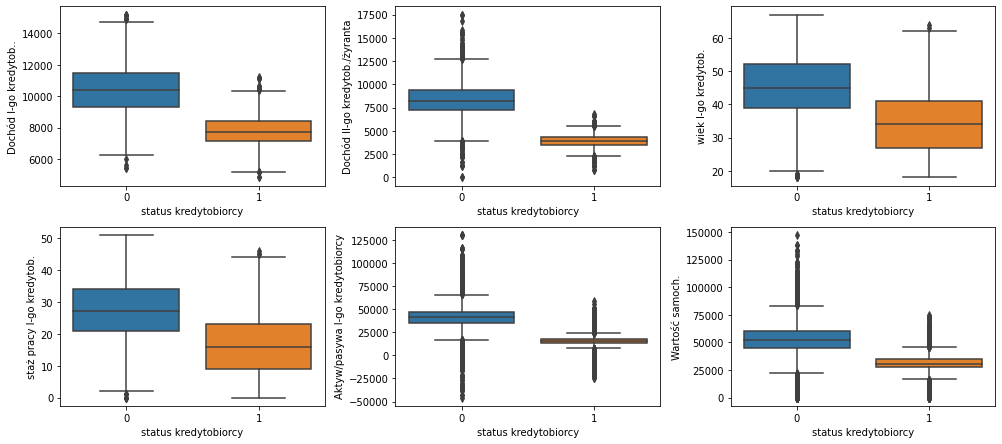

In [35]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(ciągłe):
    plt.subplot(5,3,index+1)
    sns.boxplot(x = 'status kredytobiorcy',
                y=col, data=numeric.dropna())
fig.tight_layout(pad=1.0)

## Zmienne dyskretne

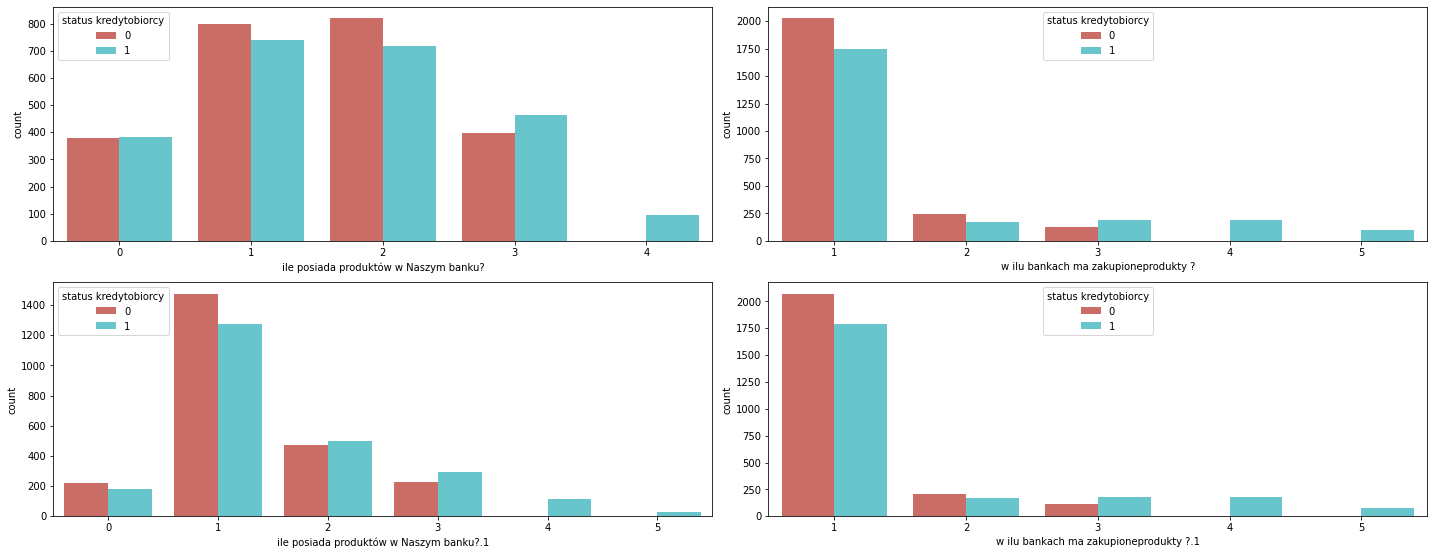

In [36]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(dyskretne):
    plt.subplot(4,2,index+1)
    sns.countplot(x=col, data=numeric.dropna(),palette = 'hls', hue = 'status kredytobiorcy')
fig.tight_layout(pad=1.0)

In [37]:
k = data['status kredytobiorcy']
categorical['status kredytobiorcy'] = k

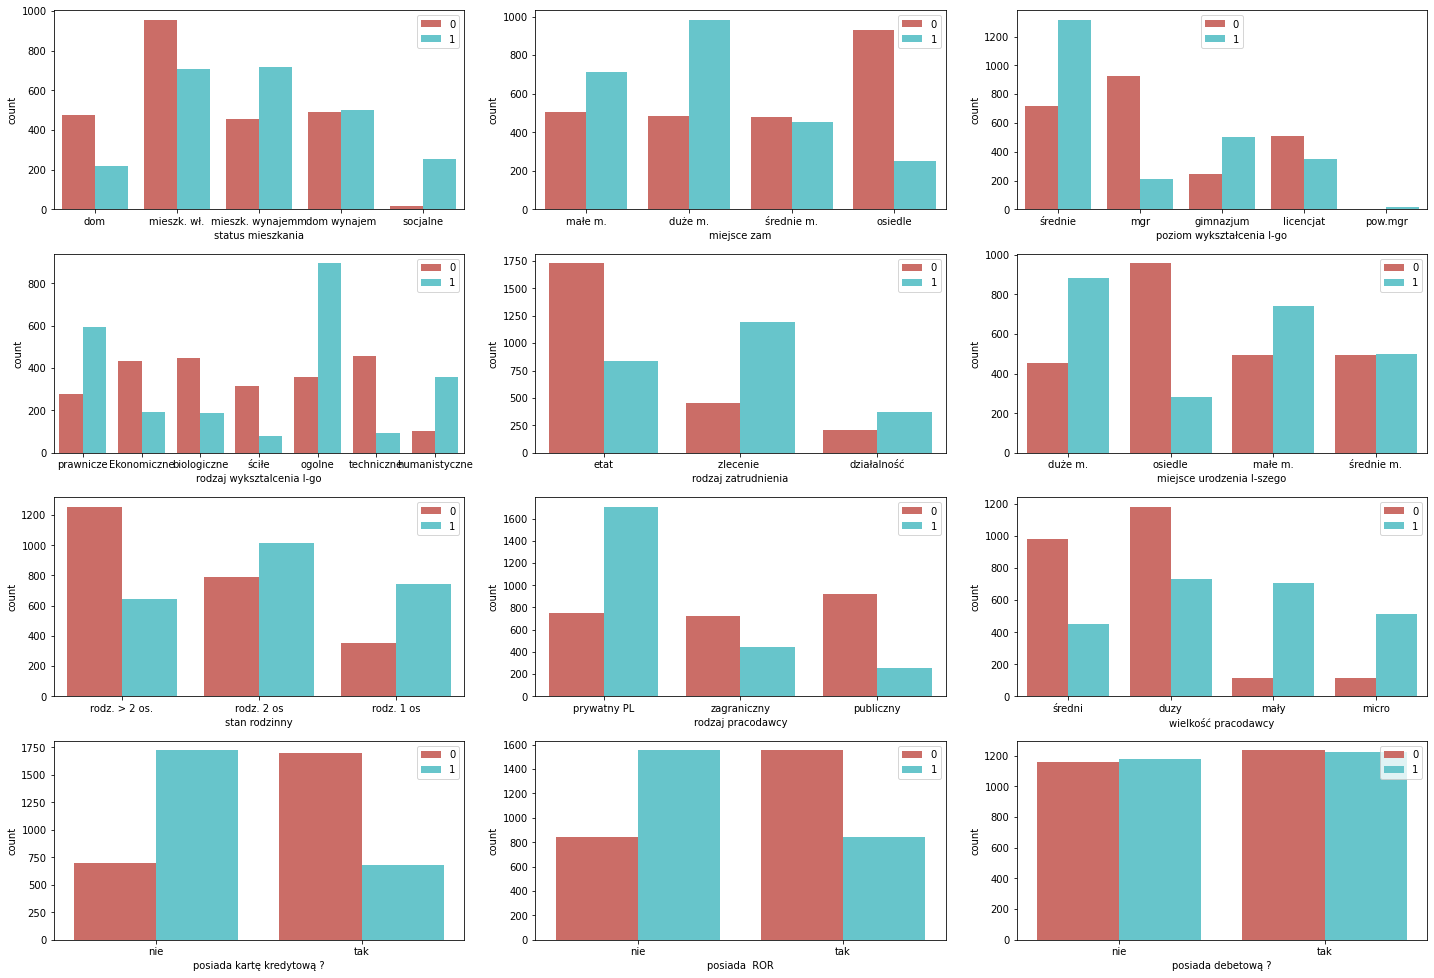

In [38]:
fig = plt.figure(figsize=(20,20))
for index,col in enumerate(cat1):
    plt.subplot(6,3,index+1)
    sns.countplot(x=col, data=categorical.dropna(), palette = 'hls', hue = 'status kredytobiorcy')
    plt.legend()
fig.tight_layout(pad=1.0)

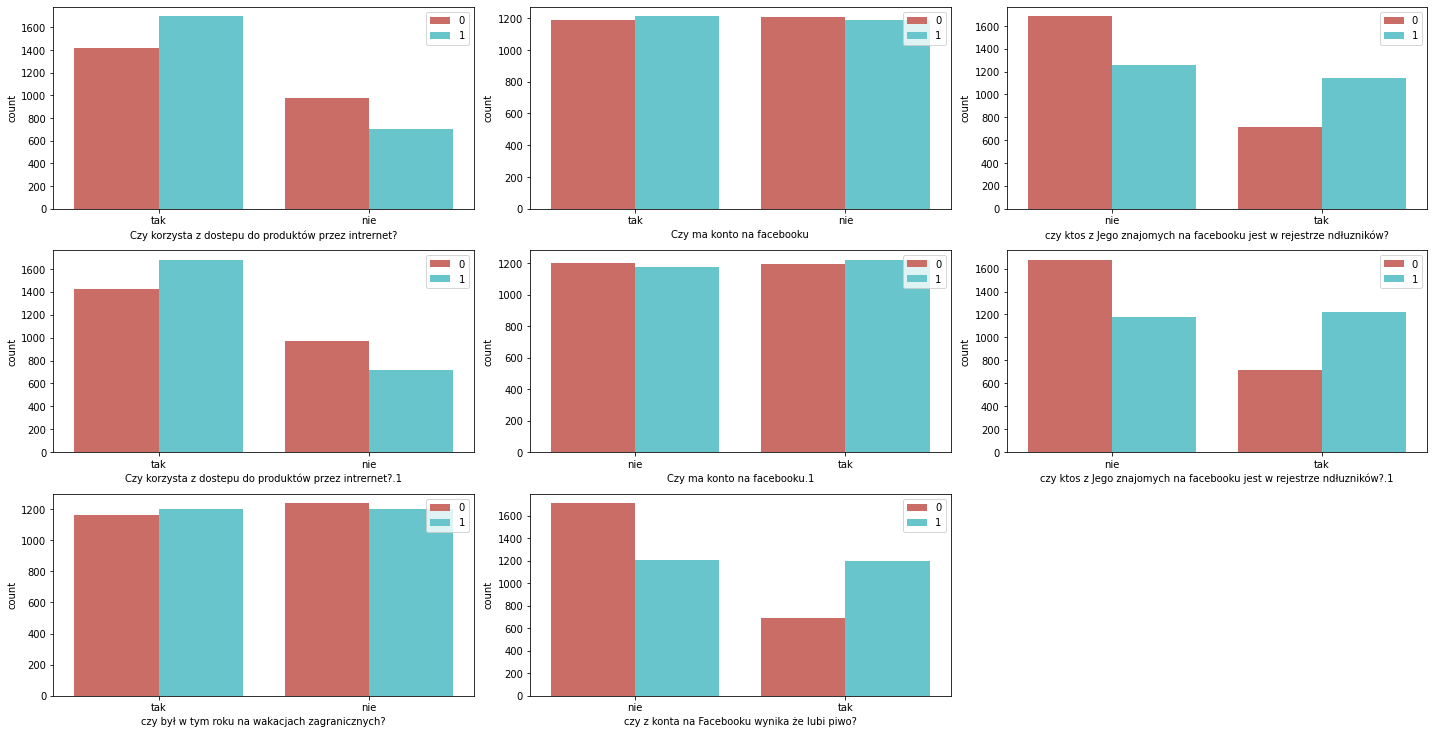

In [39]:
fig = plt.figure(figsize=(20,20))
for index,col in enumerate(cat2):
    plt.subplot(6,3,index+1)
    sns.countplot(x=col, data=categorical.dropna(), palette = 'hls', hue = 'status kredytobiorcy')
    plt.legend()
fig.tight_layout(pad=1.0)

In [40]:
data.columns

Index(['status kredytobiorcy', 'status mieszkania', 'Dochód I-go kredytob..',
       'Dochód II-go kredytob./żyranta', 'miejsce zam',
       'poziom wykształcenia I-go', 'rodzaj wyksztalcenia I-go',
       'wiek I-go kredytob.', 'staż pracy I-go kredytob.',
       'Aktyw/pasywa I-go kredytobiorcy', 'rodzaj zatrudnienia',
       'miejsce urodzenia I-szego', 'stan rodzinny', 'Wartość samoch.',
       'rodzaj pracodawcy', 'wielkość pracodawcy', 'posiada kartę kredytową ?',
       'posiada  ROR', 'posiada debetową ?',
       'Czy korzysta z dostepu do produktów przez intrernet?',
       'Czy ma konto na facebooku',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?',
       'ile posiada produktów w Naszym banku?',
       'w ilu bankach ma zakupioneprodukty ?',
       'Czy korzysta z dostepu do produktów przez intrernet?.1',
       'Czy ma konto na facebooku.1',
       'czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1',
       'ile posiada produ

In [41]:
kolumny = ['Dochód I-go kredytob..', 'Dochód II-go kredytob./żyranta', 'wiek I-go kredytob.' ,
          'staż pracy I-go kredytob.', 'Aktyw/pasywa I-go kredytobiorcy', 'Wartość samoch.', 
          'status kredytobiorcy']

### Wykresy korelacji

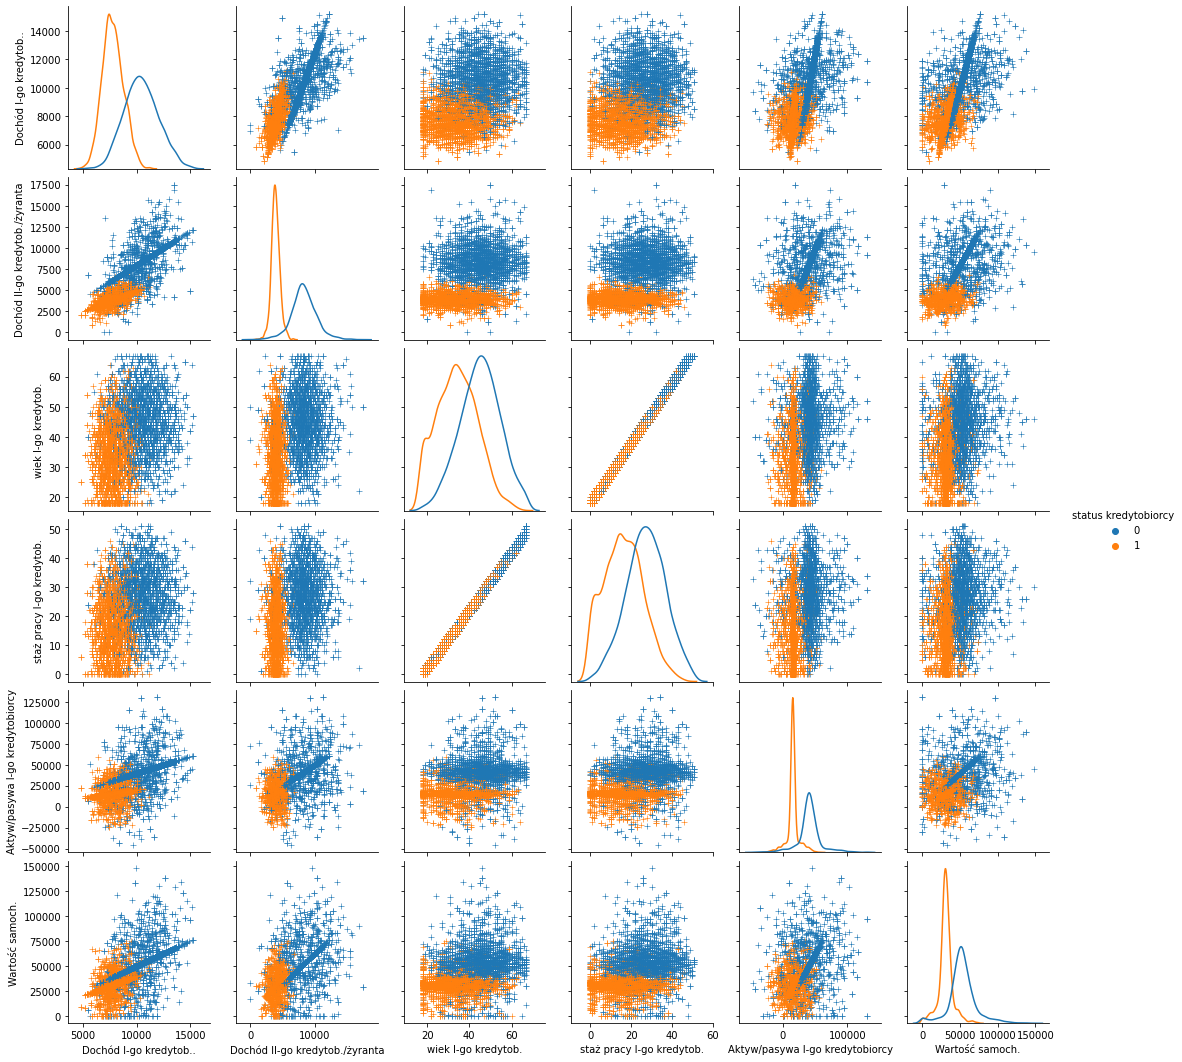

In [42]:
sns.pairplot(data[kolumny],  hue = 'status kredytobiorcy', plot_kws=dict(marker="+", linewidth=0.6),
    diag_kws=dict(fill=False))

### Korelacja

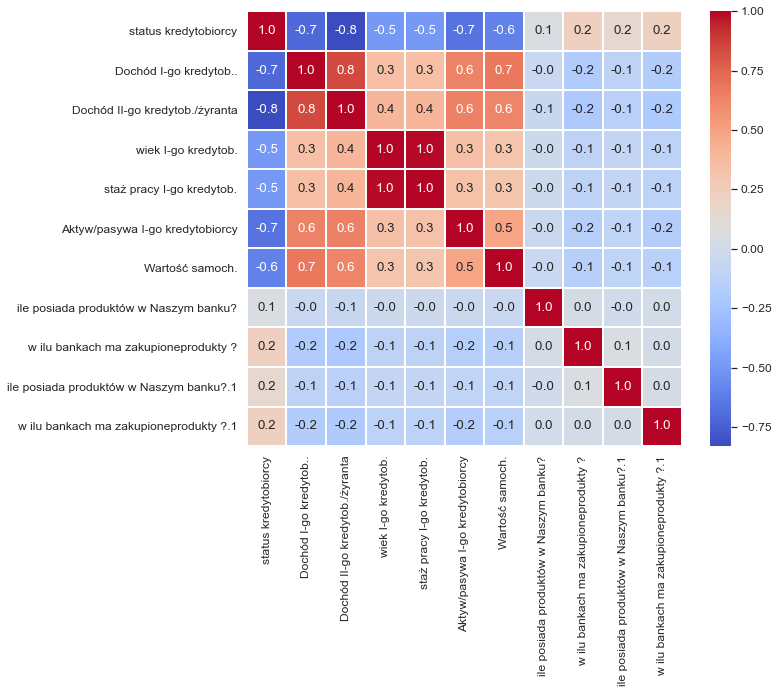

In [43]:
sns.set(font_scale=1.1)
korelacja = data.corr()
mask = np.triu(korelacja.corr())
plt.figure(figsize=(10,8))
sns.heatmap(korelacja,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            linewidths=1,
            cbar=True)

plt.show()

## Wyrzucenie obserwacji odstających na podstawie wykresów pudełkowych

In [44]:
data = data.drop(data[(data['Dochód I-go kredytob..'] > 14500)].index)
data = data.drop(data[(data['Dochód II-go kredytob./żyranta'] > 15000)].index)
data = data.drop(data[(data['Aktyw/pasywa I-go kredytobiorcy'] > 75000)].index)
data = data.drop(data[(data['Aktyw/pasywa I-go kredytobiorcy'] < -25000)].index)
data = data.drop(data[(data['Wartość samoch.'] > 100000)].index)

## Inżynieria cech

Na tym etapie stworzyłem kilka dodatkowych cech wielomianowych. Kodowanie zmiennych kategorycznych zrobiłem na dwa sposoby. Zmienne porządkowe zamieniłem na zmienne numeryczne (label encoding) oraz wszystkie zmienne kategoryczne zakodowałem metodą OHE.

In [45]:
data['wiek^2'] = data['wiek I-go kredytob.']*data['wiek I-go kredytob.']
data['staż/wiek'] = data['staż pracy I-go kredytob.']/data['wiek I-go kredytob.']
data['staż*wiek'] = data['staż pracy I-go kredytob.']*data['wiek I-go kredytob.']
data['log(dochód I-go)']= np.log(data['Dochód I-go kredytob..'])
data['aktywa*samochód'] = data['Aktyw/pasywa I-go kredytobiorcy'] * data['Wartość samoch.']  
data['staż*samochód'] = data['staż pracy I-go kredytob.']*data['Wartość samoch.']
data['wiek*samochód'] = data['wiek I-go kredytob.']*data['Wartość samoch.']
data['Aktywa+Samochód'] = data['Aktyw/pasywa I-go kredytobiorcy'] + data['Wartość samoch.'] 

In [46]:
wykształcenie_map = {"średnie":1, "gimnazjum":2, "licencjat":3, 'mgr':4, 'pow.mgr':5}
data['poziom wykształcenia O'] = data["poziom wykształcenia I-go"].replace(wykształcenie_map)

zamieszkanie_map = {'małe m.':1, 'duże m.':3, 'średnie m.':2, 'osiedle':0}
data['miejsce zam O'] = data["miejsce zam"].replace(zamieszkanie_map)

zatrudnienie_map = {"zlecenie ":1, "etat":2, "działalność":3}
data['rodzaj zatrudnienia O'] = data["rodzaj zatrudnienia"].replace(zatrudnienie_map)

urodzenie_map = {'małe m.':1, 'duże m.':3, 'średnie m.':2, 'osiedle':0}
data['miejsce urodzenia I-szego O'] = data["miejsce urodzenia I-szego"].replace(urodzenie_map)

rodzina_map = {'rodz. > 2 os.':3, 'rodz. 2 os':2, 'rodz. 1 os':1, }
data['stan rodzinny O'] = data["stan rodzinny"].replace(rodzina_map)

pracodawca_map = {'duzy':3, 'średni':2, 'mały':1,'micro':0 }
data['wielkość pracodawcy O'] = data["wielkość pracodawcy"].replace(pracodawca_map)


In [47]:
X = data.loc[:, data.columns != 'status kredytobiorcy']
y = data.loc[:, data.columns == 'status kredytobiorcy']


In [48]:
X = pd.get_dummies(X, drop_first = False)

In [49]:
X.head()

,Dochód I-go kredytob..,Dochód II-go kredytob./żyranta,wiek I-go kredytob.,staż pracy I-go kredytob.,Aktyw/pasywa I-go kredytobiorcy,Wartość samoch.,ile posiada produktów w Naszym banku?,w ilu bankach ma zakupioneprodukty ?,ile posiada produktów w Naszym banku?.1,w ilu bankach ma zakupioneprodukty ?.1,...,Czy korzysta z dostepu do produktów przez intrernet?.1_nie,Czy korzysta z dostepu do produktów przez intrernet?.1_tak,Czy ma konto na facebooku.1_nie,Czy ma konto na facebooku.1_tak,czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1_nie,czy ktos z Jego znajomych na facebooku jest w rejestrze ndłuzników?.1_tak,czy był w tym roku na wakacjach zagranicznych?_nie,czy był w tym roku na wakacjach zagranicznych?_tak,czy z konta na Facebooku wynika że lubi piwo?_nie,czy z konta na Facebooku wynika że lubi piwo?_tak
0,13455.40,11247.41,43,24,-11241.33,58068.75,2,1,3,1,...,0,1,1,0,1,0,0,1,1,0
2,9649.56,7686.70,45,25,22552.74,55622.22,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
4,12823.45,10454.14,49,30,48096.57,18313.63,0,1,2,1,...,0,1,1,0,1,0,0,1,0,1
6,11515.76,8940.81,38,22,52108.44,78154.96,1,1,1,1,...,1,0,0,1,0,1,1,0,1,0
7,13413.81,7533.19,44,24,52403.83,38149.49,1,1,3,1,...,0,1,0,1,1,0,1,0,1,0


In [50]:
X['status kredytobiorcy'] = y

In [51]:
korelacja_z_Y = X.corr().abs()
korelacja_z_Y[['status kredytobiorcy']].sort_values(['status kredytobiorcy'], ascending=False).tail(20)

,status kredytobiorcy
Czy korzysta z dostepu do produktów przez intrernet?.1_tak,0.112761
Czy korzysta z dostepu do produktów przez intrernet?.1_nie,0.112761
status mieszkania_mieszk. wł.,0.103061
miejsce zam_małe m.,0.100155
rodzaj zatrudnienia_działalność,0.099259
stan rodzinny_rodz. 2 os,0.093964
poziom wykształcenia I-go_licencjat,0.089158
ile posiada produktów w Naszym banku?,0.065852
poziom wykształcenia I-go_pow.mgr,0.060094
czy był w tym roku na wakacjach zagranicznych?_tak,0.014837


In [52]:
to_drop = ['czy był w tym roku na wakacjach zagranicznych?_tak', 
           'czy był w tym roku na wakacjach zagranicznych?_nie', 
           'miejsce zam_średnie m.', 'Czy ma konto na facebooku.1_tak',
          'Czy ma konto na facebooku.1_nie', 'Czy ma konto na facebooku_nie',
          'Czy ma konto na facebooku_tak', 'posiada debetową ?_nie', 'posiada debetową ?_tak',
          'status mieszkania_dom wynajem', 'miejsce urodzenia I-szego_średnie m.']

Wyrzucono wszystkie zmienne dla których korelacja ze zmienną celu wyniosła mniej niż 0,05.

In [53]:
X = X.drop(to_drop, axis=1)

In [54]:
X.shape

(4612, 74)

In [55]:
#Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X =scaler.fit_transform(X)


# Modelowanie

Przygotowałem już wszystko do budowy modelu. Na tym etapie zajmę się strojeniem parametrów do modelu za pomocą metody GridSearchCV. Pod koniec każdej metody sprawdzę za pomocą sprawdzianu krzyżowego jakość modelu.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

## Regresja logistyczna

In [57]:
logreg = LogisticRegression(max_iter = 500, random_state = 1)
logreg.fit(X_train, y_train)
log_pred_train = logreg.predict(X_train)

In [58]:
y_pred_log = logreg.predict(X_train)
print('Trafność regresji logistycznej na zbiorze treningowym: {:.2f}'.format(logreg.score(X_train, y_train)))

Trafność regresji logistycznej na zbiorze treningowym: 1.00


In [59]:
#Czułość precyzja f1-score
from sklearn.metrics import classification_report
print(classification_report(y_train, log_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [60]:
log_pred_test = logreg.predict(X_test)
print('Trafność regresji logistycznej na zbiorze testowym: {:.2f}'.format(logreg.score(X_test, y_test)))

Trafność regresji logistycznej na zbiorze testowym: 1.00


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



### Krzywa ROC/AUC

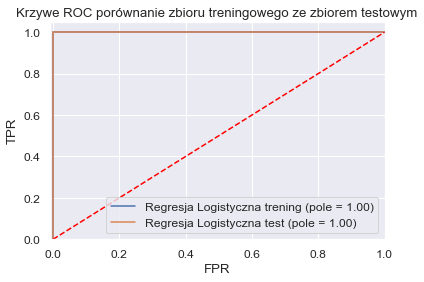

In [62]:
#Krzywa ROC/AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Trening
logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.plot(fpr_train, tpr_train, label='Regresja Logistyczna trening (pole = %0.2f)' % logit_roc_auc_train)

#Test
logit_roc_auc_test = roc_auc_score(y_test, logreg.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr_test, tpr_test, label='Regresja Logistyczna test (pole = %0.2f)' % logit_roc_auc_test)

#Wykres
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywe ROC porównanie zbioru treningowego ze zbiorem testowym')
plt.legend(loc="lower right")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV

### Sprawdzian krzyżowy

In [64]:
log_score = cross_val_score(logreg, X, y, cv = 10)
#Score logreg cross validation
print("Średni wynik", log_score.mean())

Średni wynik 1.0


## K-najbliższych sąsiadów

### Strojenie hiperparametrów

In [65]:
knn_params = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16],
         'weights': ['uniform', 'distance'],
         'metric':['minkowski'], 'p': [1,2]}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5)
knn_results = knn_gs.fit(X_train, y_train)

In [66]:
print(knn_results.best_score_)
print(knn_results.best_estimator_)
print(knn_results.best_params_)

0.9835783713730291
KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
{'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [67]:
knn = KNeighborsClassifier(n_neighbors = 10, p = 1, weights = 'distance')
knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
print('Trafność modelu k-najbliższych sąsiadów na zbiorze treningowym: {:.2f}'.format(knn.score(X_train, y_train)))

Trafność modelu k-najbliższych sąsiadów na zbiorze treningowym: 1.00


In [68]:
#Czułość precyzja f1-score
from sklearn.metrics import classification_report
print(classification_report(y_train, knn_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [69]:
knn_pred_test = knn.predict(X_test)
print('Trafność modelu k-najbliższych sąsiadów na zbiorze testowym: {:.2f}'.format(knn.score(X_test, y_test)))

Trafność modelu k-najbliższych sąsiadów na zbiorze testowym: 0.99


In [70]:
#Czułość precyzja f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       654
           1       0.99      0.99      0.99       730

    accuracy                           0.99      1384
   macro avg       0.99      0.99      0.99      1384
weighted avg       0.99      0.99      0.99      1384



### Krzywa ROC/AUC

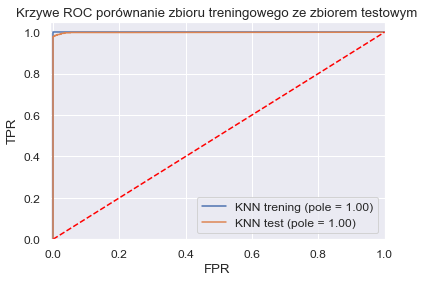

In [71]:
#Krzywa ROC/AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Trening
knn_roc_auc_train = roc_auc_score(y_train, knn.predict(X_train))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, knn.predict_proba(X_train)[:,1])
plt.plot(fpr_train, tpr_train, label='KNN trening (pole = %0.2f)' % logit_roc_auc_train)

#Test
knn_roc_auc_test = roc_auc_score(y_test, knn.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr_test, tpr_test, label='KNN test (pole = %0.2f)' % logit_roc_auc_test)

#Wykres
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywe ROC porównanie zbioru treningowego ze zbiorem testowym')
plt.legend(loc="lower right")
plt.show()

### Sprawdzian krzyżowy

In [72]:
knn_score = cross_val_score(knn, X, y, cv = 10)
#Score logreg cross validation
print("Średni wynik", knn_score.mean())

Średni wynik 0.9869942060831433


## Sieć neuronowa

In [73]:
neural = MLPClassifier(solver = 'adam',random_state = 1)
neural.fit(X_train, y_train)
neural_pred_train = neural.predict(X_train)
print('Trafność sieci neuronowej na zbiorze treningowym {:.2f}'.format(neural.score(X_train, y_train)))

Trafność sieci neuronowej na zbiorze treningowym 1.00


In [74]:
print(classification_report(y_train, neural_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [75]:
neural_pred_test = neural.predict(X_test)
print('Trafność sieci neuronowej na zbiorze testowym: {:.2f}'.format(neural.score(X_test, y_test)))

Trafność sieci neuronowej na zbiorze testowym: 1.00


In [76]:
print(classification_report(y_test, neural_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



### Krzywa ROC/AUC

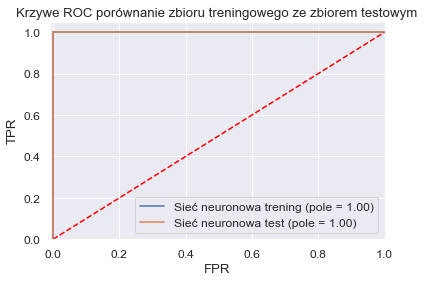

In [77]:
#Krzywa ROC/AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Trening
mlp_roc_auc_train = roc_auc_score(y_train, neural.predict(X_train))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, neural.predict_proba(X_train)[:,1])
plt.plot(fpr_train, tpr_train, label='Sieć neuronowa trening (pole = %0.2f)' % logit_roc_auc_train)

#Test
mlp_roc_auc_test = roc_auc_score(y_test, neural.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, neural.predict_proba(X_test)[:,1])
plt.plot(fpr_test, tpr_test, label='Sieć neuronowa test (pole = %0.2f)' % logit_roc_auc_test)

#Wykres
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywe ROC porównanie zbioru treningowego ze zbiorem testowym')
plt.legend(loc="lower right")
plt.show()

### Sprawdzian krzyżowy

In [78]:
neural_score = cross_val_score(neural, X, y, cv = 10)
#Score logreg cross validation
print("Średni wynik", neural_score.mean())

Średni wynik 0.9997830802603037


## Drzewo decyzyjne

### Strojenie hiperparametrów

In [79]:
tree_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20]}
tree_gs = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10)
tree_results = tree_gs.fit(X_train, y_train)

In [80]:
print(tree_results.best_score_)
print(tree_results.best_estimator_)
print(tree_results.best_params_)

1.0
DecisionTreeClassifier(max_depth=4)
{'criterion': 'gini', 'max_depth': 4}


In [81]:
tree = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
tree.fit(X_train, y_train)
tree_pred_train = tree.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(tree.score(X_train, y_train)))
print(classification_report(y_train, tree_pred_train))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1670

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [82]:
tree_pred_test = tree.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree_pred_test))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



### Krzywa ROC/AUC

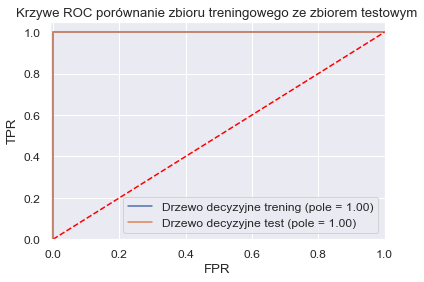

In [83]:
#Krzywa ROC/AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Trening
tree_roc_auc_train = roc_auc_score(y_train, tree.predict(X_train))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, tree.predict_proba(X_train)[:,1])
plt.plot(fpr_train, tpr_train, label='Drzewo decyzyjne trening (pole = %0.2f)' % logit_roc_auc_train)

#Test
tree_roc_auc_test = roc_auc_score(y_test, tree.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.plot(fpr_test, tpr_test, label='Drzewo decyzyjne test (pole = %0.2f)' % logit_roc_auc_test)

#Wykres
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywe ROC porównanie zbioru treningowego ze zbiorem testowym')
plt.legend(loc="lower right")
plt.show()

### Sprawdzian krzyżowy

In [84]:
tree_score = cross_val_score(tree, X, y, cv = 10)
#Score logreg cross validation
print("Średni wynik", tree_score.mean())

Średni wynik 1.0


# Wnioski

Na początku zbudowaliśmy model regresji logistycznej celem porównania z końcowymi wynikami. Dzięki usunięciu obserwacji odstających i stworzeniu kilku nowych cech poprawiliśmy wyniki naszych modeli. Bez inżynierii danych model regresji logistycznej poprawnie klasyfikował 98% przypadków. Po inżynierii model klasyfikował już perfekcyjnie. Dodatkowo można zauważyć, że trafności na zbiorze testowym i zbiorze treningowym są porównywalne, a więc nie doszło do przetrenowania danych. Model k-najbliższych sąsiadów nie ma 100% celności, można by stworzyć kolejne cechy i sprawdzić, czy dodatkowe cechy poprawią wynik. Skalowanie danych potraktowałem jako element przygotowania danych do modelów, stąd znormalizowałem na pełnych danych. Poprawniej byłoby zrobić to oddzielnie dla zbioru testowego i oddzielnie dla zbioru treningowego, by uniknąć przecieku danych.